<a href="https://colab.research.google.com/github/shineeyang/Machine-Learning/blob/master/Project_AFW_Easy_To_Fill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Angel Flight West (AFW): Non-Profit Coordinating Non-Emergency Medical Air Travel

### Definition of "Mission": When a volunteer pilot transports a passenger seeking medical treatment (or for other compelling needs)

### Problem Statement: Can we predict that a mission requested will be easy to fill with a volunteer pilot?





In [0]:
from IPython.display import Image
Image('colab.jpg', width=1000, height=700)

## Importing Libraries

In [0]:
### Importing libraries for data processing, modelling and visualization

import sys # to access system parameters
import pandas as pd # to access a collection of functions for data processing and analysis, containis sql like functionality
import matplotlib # to access a collection of functions for scientific and publication-ready visualization
import numpy as np # foundational package for scientific computing
import scipy as sp # collection of functions for scientific computing and advance mathematics

# Formatted printing of data frames
import IPython
from IPython import display 
import sklearn # to access a collection of machine learning algorithms

# Importing misc libraries
import random
import time

# Importing model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Importing model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Importing visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configurinig visualization defaults

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Importing Dataset

In [0]:
df = pd.read_csv("drive/My Drive/easy_to_fill.csv", header=0)

from_df = pd.read_csv("drive/My Drive/from_state.csv", header=0)

from_ll_df = pd.read_csv("drive/My Drive/from_latlong.csv", header=0)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10751 entries, 0 to 10750
Data columns (total 29 columns):
easy_to_fill         10751 non-null int64
id                   10751 non-null int64
transportation       10751 non-null object
from_airport_id      10751 non-null int64
to_airport_id        10751 non-null int64
mission_month        10751 non-null int64
mission_day          10751 non-null int64
request_date         10751 non-null object
mission_date         10751 non-null object
repeat_pair          10751 non-null int64
repeat_pax           10751 non-null int64
total_legs           10751 non-null int64
flight_route         10751 non-null int64
flight_route_name    10751 non-null object
illness              10733 non-null object
total_weight         10751 non-null int64
distance             10751 non-null int64
pas_age              10751 non-null int64
from_city            10751 non-null object
from_state           10751 non-null object
to_city              10751 non-null object
t

In [0]:

import plotly.plotly as py
import pandas as pd

df=from_ll_df


scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
    lat = df['from_lat'],
    lon = df['from_long'],
    text = df['easy_to_fill_state'].astype(str) + ' inches',
    marker = dict(
        color = df['easy_to_fill_state'],
        colorscale = scl,
        reversescale = False,
        opacity = 0.5,
        size = 10,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 4,
            showticksuffix = "last",
            ticksuffix = " inches",
            dtick = 1
        ),
    ),
    type = 'scattergeo'
) ]

layout = dict(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'US Precipitation 06-30-2015<br>Source: <a href="http://water.weather.gov/precip/">NOAA</a>',
)
fig = { 'data':data, 'layout':layout }
py.iplot(fig, filename='d3-cloropleth-map')

NameError: ignored

## Data Preparation for EDA and Modeling


1. Creating Bins for Continuous Variables
2. Converting Categorical Variables
3. Defininig the Target Variable (Binary)

In [0]:
 # Converting continous variables to discrete bins
df['distance_bin'] = pd.qcut(df['distance'],4) # converting fare variable
df['weight_bin'] = pd.qcut(df['weight'].astype(int), 3) # converting age variable
df['request_lead_time_bin'] = pd.qcut(df['request_lead_time'].astype(int), 9) # converting age variable
#df['pas_age_bin'] = pd.qcut(df['pas_age'],3) # converting fare variable
#df['pas_age_bin']= df['pas_age'].apply(lambda x: 0 if x<=5 else (1 if x>5 and x<= 15 else 2))
df['pas_age_bin']= df['pas_age'].apply(lambda x: 0 if x<=5 else 1)
#df['distance_bin']= df['distance'].apply(lambda x: 0 if x<=250 else 1)
df['mission_month_bin'] = pd.qcut(df['mission_month'].astype(int), 4)
# Converting Categorical Variables
label = LabelEncoder()

df['pas_age_bin'] = label.fit_transform(df['pas_age_bin'])
df['distance_bin_code'] = label.fit_transform(df['distance_bin'])
df['repeat_passenger_code'] = label.fit_transform(df['repeat_pax'])
df['request_lead_time_bin_code'] = label.fit_transform(df['request_lead_time_bin'])
df['weight_bin_code'] = label.fit_transform(df['weight_bin'])
df['flight_route_code'] = label.fit_transform(df['flight_route'])
df['illness_code'] = label.fit_transform(df['illness'].astype(str))
df['from_airport_id_code'] = label.fit_transform(df['to_airport_id'])
df['mission_month_code'] = label.fit_transform(df['mission_month'])
df['mission_day_code'] = label.fit_transform(df['mission_day'])

original_df = df

drop_column = ['id','transportation','mission_date','request_date']
df.drop(drop_column, axis=1, inplace = True)

train_df = df

#Defining target column to compare against predictions
Target = ['easy_to_fill']

#define x variables for original features aka feature selection
train_df_x = ['mission_month','mission_day', 'from_airport_id', 'to_airport_id','total_legs', 'flight_route', 'illness', 'weight', 'distance'] #pretty name/values for charts
train_df_x_calc =['request_lead_time_bin_code','total_legs', 'weight', 'distance'] #pretty name/values for charts
train_df_xy =  Target  + train_df_x
print('Original X Y: ', train_df_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
train_df_x_bin = ['request_lead_time_bin_code','total_legs','distance_bin_code','weight_bin_code'] #pretty name/values for charts
train_df_xy_bin = ['easy_to_fill'] + train_df_x_bin
print('Bin X Y: ', train_df_xy_bin, '\n')

#define x and y variables for dummy features original
train_df_dummy = pd.get_dummies(train_df_x)
train_df_x_dummy = train_df_dummy.columns.tolist()
train_df_xy_dummy = Target  + train_df_x_dummy
print('Dummy X Y: ', train_df_xy_dummy, '\n')


    

Original X Y:  ['easy_to_fill', 'mission_month', 'mission_day', 'from_airport_id', 'to_airport_id', 'total_legs', 'flight_route', 'illness', 'weight', 'distance'] 

Bin X Y:  ['easy_to_fill', 'request_lead_time_bin_code', 'total_legs', 'distance_bin_code', 'weight_bin_code'] 

Dummy X Y:  ['easy_to_fill', 'distance', 'flight_route', 'from_airport_id', 'illness', 'mission_day', 'mission_month', 'to_airport_id', 'total_legs', 'weight'] 



## Investigating the Relationship Between Variables in the Dataset 

Further investigating their impact on filling a mission

In [0]:
# Creating pair plot to investigate easy to fill 

pp = sns.pairplot(train_df, hue = 'easy_to_fill', palette = 'deep', size=1.7, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])



## Investigating the Relationship Between Variables in the Dataset using a Correlation Heatmap 

Ineffective for Categorical Variables


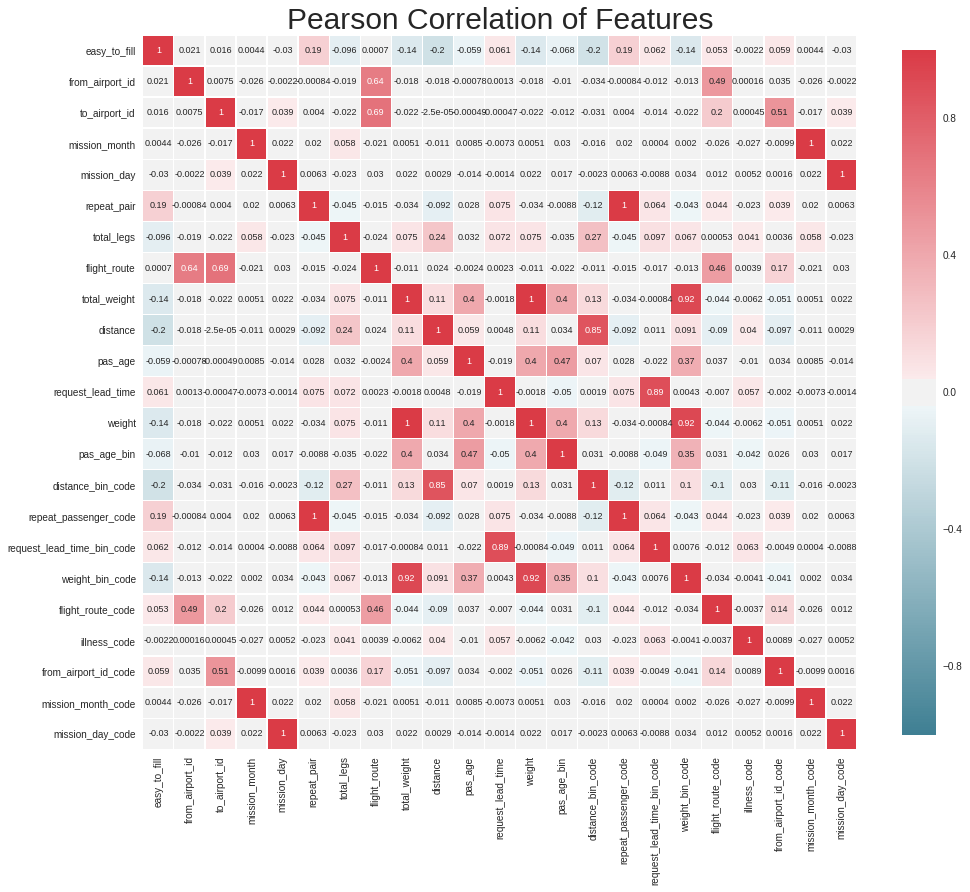

In [0]:
#Running correlation analysis on the dataset

def correlation_heatmap(train_df):
    _ , ax = plt.subplots(figsize =(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        train_df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.2,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=30)

correlation_heatmap(train_df)

## How does the day/month affect a pilots willingness to voluntarily take on a mission?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



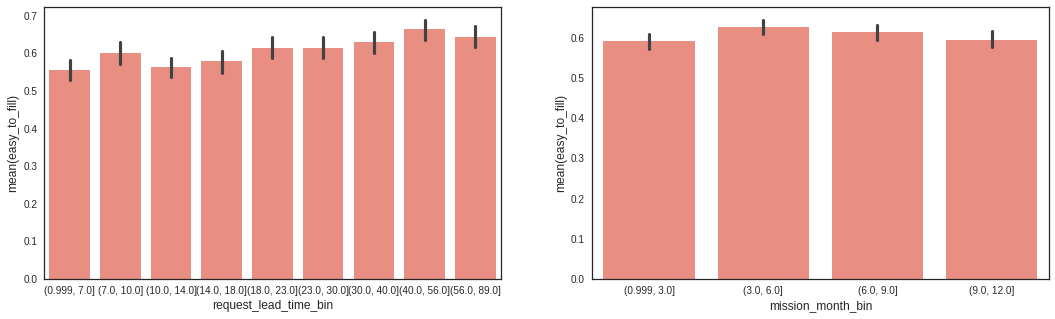

In [0]:
# Comparing Variables Together
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,5))

sns.barplot(x = 'request_lead_time_bin', y = 'easy_to_fill', data=train_df , color="salmon", ax = axis1)
sns.barplot(x = 'mission_month_bin', y = 'easy_to_fill', data=train_df , color="salmon",  ax = axis2)


## Do pilots volunteer to take on more missions for repeat passengers?

0- New Pilot-Passenger Pair

1- Repeat Pilot-Passenger Pair

## Do pilots volunteer to take on more missions for younger children?

0- Age: Infant- 5yrs

1- Age: Above 5 yrs

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


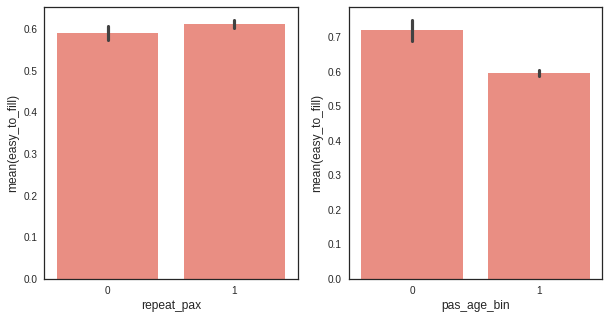

In [0]:
# Comparing Variables Together
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.barplot(x = 'repeat_pax', y = 'easy_to_fill', color="salmon",  data=train_df , ax = axis1)
sns.barplot(x = 'pas_age_bin', y = 'easy_to_fill', color="salmon",  data=train_df , ax = axis2)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



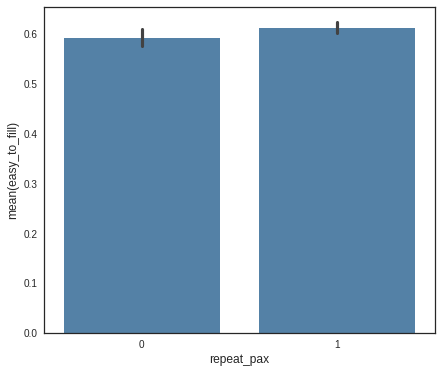

In [0]:
# Comparing Variables Together
fig, (axis1) = plt.subplots(1,1,figsize=(7,6))

#sns.barplot(x = 'repeat_pair', y = 'easy_to_fill', color="salmon",  data=train_df , ax = axis1)
sns.barplot(x = 'repeat_pax', y = 'easy_to_fill', color="steelblue",  data=train_df, ax = axis1 )


## What are the illnesses that pilots are requesting to fly passengers for voluntarily?

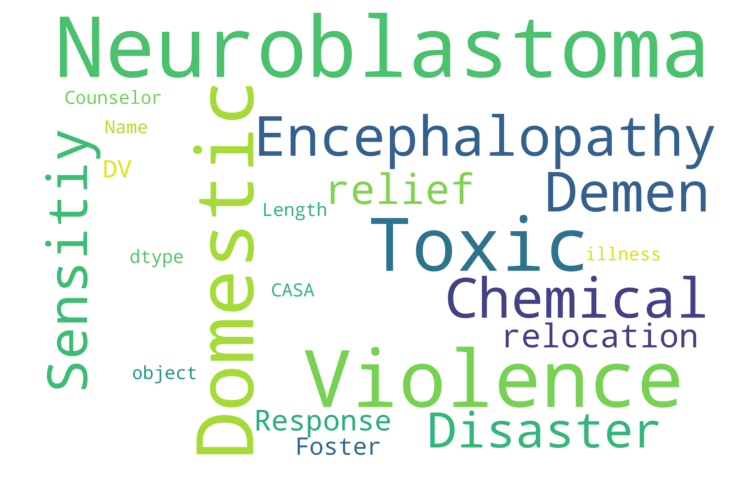

In [0]:
import os

from os import path
from wordcloud import WordCloud, STOPWORDS

illness_df = train_df[(train_df['easy_to_fill']==1)]

# Read the whole text.
text = str(illness_df['illness'])

# Generate a word cloud image
#wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS,collocations=False).generate(str(text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Do pilots factor in weight and distance when they reqest to volunteer for a mission?

In [0]:
df_sub = train_df[(train_df["distance"]<500) & (train_df["weight"]<400)]
ax = sns.scatterplot(x="request_lead_time", y="distance",
                      hue="easy_to_fill",  data=df_sub)

AttributeError: ignored

In [0]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (3.6.1)


## Geographic Distribution of Easy to Fill Missions

### Where should AFW put in more efforts to motivate pilots?

https://drive.google.com/open?id=1dq1o1lyD6_GmM3ffUQ9J6_ACZ5bN5mxY

In [0]:
import plotly.plotly as py
import pandas as pd


py.sign_in('mpk314', '8l6978BS8O8B6QkxQfMt')

for col in from_df.columns:
    from_df[col] = from_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

from_df['text'] = from_df['from_state'] + '<br>' +\
    'Easy to Fill: '+from_df['easy_to_fill_state']+' %'+ '<br>' +\
'Repeat Passengerr: '+from_df['repeat_pax']+' %'+'<br>'+\
    'Avg Distance '+from_df['avg_distance']+' miles'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = from_df['from_state'],
        z = from_df['easy_to_fill_state'].astype(float),
        locationmode = 'USA-states',
        text = from_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Easy to Fill %")
        ) ]

layout = dict(
        title = 'Easy to Fill Mission % by State<br>(Hover for details and additional metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## Predicting whether a mission will be easy to fill or not

1. Running ML Models
2. Comparing Mean Accuracy of Models
3. Investigating Feature importance for each model

In [0]:

importance = dict()
import math

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    #linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    #linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    #tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_df[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_df[train_df_x_calc], train_df[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = math.ceil(cv_results['train_score'].mean()*100)
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = math.ceil(cv_results['test_score'].mean()*100)   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = (cv_results['test_score'].std()*3*100)   #let's know the worst that can happen!
    
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_df[train_df_x_calc], train_df[Target])
    MLA_predict[MLA_name] = alg.predict(train_df[train_df_x_calc])
    
   
    try:
      importance[row_index] = dict({'MLA': MLA_name, 'feature':train_df[train_df_x_calc].columns,'importance':np.round(alg.feature_importances_,3)})
      importance[row_index] = importance.sort_values('importance',ascending=False).set_index('feature')
      #importances.tail(20)
    
    except AttributeError : 
      row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConv

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",92,73,2.10729,0.113522
0,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",70,68,3.32773,0.317233
2,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",69,68,2.84546,0.197351


In [0]:
# Displaying feature importance by ML Algorithm
importance

{0: {'MLA': 'GradientBoostingClassifier',
  'feature': Index(['request_lead_time_bin_code', 'total_legs', 'weight', 'distance'], dtype='object'),
  'importance': array([0.078, 0.132, 0.267, 0.523])},
 1: {'MLA': 'RandomForestClassifier',
  'feature': Index(['request_lead_time_bin_code', 'total_legs', 'weight', 'distance'], dtype='object'),
  'importance': array([0.183, 0.068, 0.347, 0.402])},
 2: {'MLA': 'XGBClassifier',
  'feature': Index(['request_lead_time_bin_code', 'total_legs', 'weight', 'distance'], dtype='object'),
  'importance': array([0.111, 0.112, 0.348, 0.429], dtype=float32)}}

## Conclusion

ML Model Improvement:

1. Include Additional Bins: such as seasons instead of months
2. Include pilot profile information to incorporate the information around the available nature of the supply when a mission request comes in 
3. Investigate using recurrent neural net (RNN) since a lot of the columns at AFW are unstructured
4. Analyze the features selected with the Practicum MIP (example: I removed total legs that are a part of the mission because it had a low importance score, but is this an important feature? )

5. Conduct Parameter Tuning


On going investigations:
1. Why is it more difficult to get pilot's to voluntarily take on missions on sunday?
2. Why is it more difficult to get pilot's to voluntarily take on missions in the summer?
3. What are the routes for which pilot's are more likely to take on missions voluntarily? (Map)
4. What are the
